# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,Not Verified | I flew from Malaga via LHR to...
2,✅ Trip Verified | Milan to Miami return via L...
3,✅ Trip Verified | BA created a new low-cost s...
4,✅ Trip Verified | I flew with British Airway...


In [4]:
# create folder called data
if not os.path.exists(os.path.join(os.getcwd(), "data")):
    os.mkdir("data")

df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Analysing Sentiments with Rule-Based Approach

This is the traditional way to do sentiment analysis based on a set of manually-created rules. This approach includes NLP techniques like lexicons (lists of words), stemming, tokenization and parsing.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet. We will be using VADER approach for this notebook.

### Step 1: Data Cleaning

We will clean the data to remove the "<b>✅ Trip Verified</b>" text, then convert the text into lower-case, and remove all
the punctuation marks from the data. This is essential as punctuation marks do not add any meaningful value for the analysis. 

In [5]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor..."
1,I flew from Malaga via LHR to Boston on the...
2,Milan to Miami return via London. Worst busi...
3,BA created a new low-cost subsidiary in BA E...
4,I flew with British Airways from Heathrow t...


In [6]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...
1,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...
2,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...
3,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...
4,I flew with British Airways from Heathrow t...,i flew with british airways from heathrow t...


### Step 2: Tokenization, Stopwords removal, and POS-tagging

1) Tokenization breaks text(or sentences, in our case) into smaller parts(or individual words) for easier machine analysis,
helping machines understand human language. Tokenization, in the realm of Natural Language Processing (NLP) and machine 
learning, refers to the process of converting a sequence of text into smaller parts, known as tokens. So here, 
we will tokenize our text data to convert it into smaller tokens(or words).

2) Stopwords are a set of commonly used words in a language. Examples of stop words in English are "a", "the", "is", "are",
etc. Stopwords are commonly used in Natural Language Processing (NLP) to eliminate words that are so widely used that carry
very little useful information. We will remove such stopwords from our data going forward.

3) Part-of-speech (POS) tagging is fundamental in natural language processing (NLP) and it involves labelling words in a 
sentence with their corresponding POS tags having form (word, tag). POS tags indicate the grammatical category of a word, 
such as noun, verb, adjective, adverb, etc. The goal of POS tagging is to determine a sentence’s syntactic structure and 
identify each word’s role in the sentence. POS tagging is essential to preserve the context of the word and is essential 
for Lemmatization.

In [7]:
import nltk

# Downloading all nltk packages to avoid compatibility issues.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet

In [10]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list 

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu..."
1,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)..."
2,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No..."
3,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)..."
4,I flew with British Airways from Heathrow t...,i flew with british airways from heathrow t...,"[(flew, v), (british, a), (airways, n), (heath..."


### Step 3: Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a 
single item, generally known as stem. A stem is responsible for the word's lexical meaning. The two popular techniques of
obtaining the stem words are Stemming and Lemmatization. 
   
We will use the Lemmatization process here as Stemming often gives some meaningless root words as it simply chops off
some characters in the end, whereas, Lemmatization gives meaningful root words. It is important to note that,
lemmatization requires POS tagging of the words, which we have already accomplished in the previous step.

In [13]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu...",lhr sfo la lgw august 2023 club world shame ...
1,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)...",fly malaga via lhr boston 4th may 2024 arriv...
2,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No...",milan miami return via london bad business c...
3,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)...",ba create new lowcost subsidiary ba euroflye...
4,I flew with British Airways from Heathrow t...,i flew with british airways from heathrow t...,"[(flew, v), (british, a), (airways, n), (heath...",fly british airway heathrow hannover althoug...


### Step 4: Sentiment Analysis (VADER)
  
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on 
social media text. Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will  give us
scores of the following categories:

- Positive
- Negative
- Neutral
- Compound
   
The compound score is the sum of positive, negative & neutral scores which is then normalized between 
-1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, 
the higher the positivity of the text. For our Analyser, we will consider compound score of >=0.5 as positive, 
and compund score of <0 as negative.

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",lhr sfo las lgw august 2023 in club world ...,"[(lhr, n), (sfo, n), (las, n), (lgw, n), (augu...",lhr sfo la lgw august 2023 club world shame ...,0.9382,Positive
1,I flew from Malaga via LHR to Boston on the...,i flew from malaga via lhr to boston on the...,"[(flew, v), (malaga, n), (via, None), (lhr, n)...",fly malaga via lhr boston 4th may 2024 arriv...,-0.7184,Negative
2,Milan to Miami return via London. Worst busi...,milan to miami return via london worst busin...,"[(milan, n), (miami, v), (return, n), (via, No...",milan miami return via london bad business c...,-0.9036,Negative
3,BA created a new low-cost subsidiary in BA E...,ba created a new lowcost subsidiary in ba eu...,"[(ba, n), (created, v), (new, a), (lowcost, n)...",ba create new lowcost subsidiary ba euroflye...,0.9874,Positive
4,I flew with British Airways from Heathrow t...,i flew with british airways from heathrow t...,"[(flew, v), (british, a), (airways, n), (heath...",fly british airway heathrow hannover althoug...,-0.8992,Negative


In [15]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Positive    467
Negative    428
Neutral     105
Name: Sentiment, dtype: int64

In [16]:
df.to_csv("data/BA_reviews_analysed.csv")

## Data Vizualization

In [19]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 300.6/300.6 kB 226.5 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


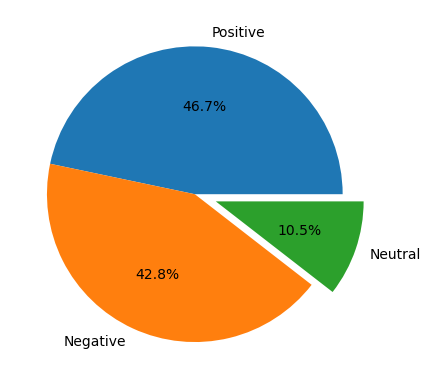

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
  
# Declaring data. 
data = sentiment_counts.values
  
# Define Seaborn color palette to use. 
palette_color = sns.color_palette() 
  
# Plotting data on chart. 
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%") 
  
# Displaying chart. 
plt.show() 

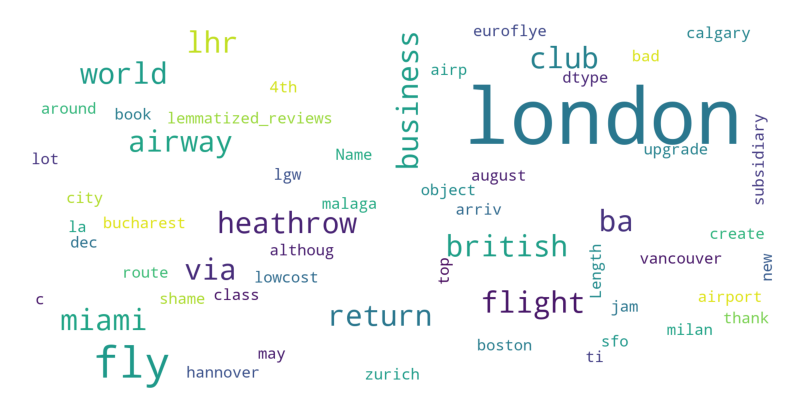

In [20]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=200, max_font_size=40, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])